In [1]:
import sys

import FISHcreation
from FISHcreation.src.preprocess import get_cell_background
from FISHcreation.src.signals import create_FISH
from FISHcreation.src.process_boxes import merge_boxes_by_color
from CellPatchExtraction import extract_patches

#debug
import matplotlib.pyplot as plt
import os
from pathlib import Path
from cellplot.cellplot.patches import gridPlot, draw_boxes_on_patch

FISHcreation.__version__

/home/simon_g/anaconda3/envs/cpe/lib/python3.9/site-packages/CellPatchExtraction/src/__init__.py
/home/simon_g/anaconda3/envs/cpe/lib/python3.9/site-packages/CellPatchExtraction/.cellpose_model ['CP_BM', 'CP_TU']


'version 0.1'

In [2]:
background = get_cell_background("/home/simon_g/src/FISHcreation/testdata/IF_RGB.TIFF", normalize=False)[:700, :700]
print(background.shape)

(700, 700, 3)


In [3]:
patches, masks, _, _, _ = extract_patches(background, "CP_TU", patch_size=128, return_all=True)

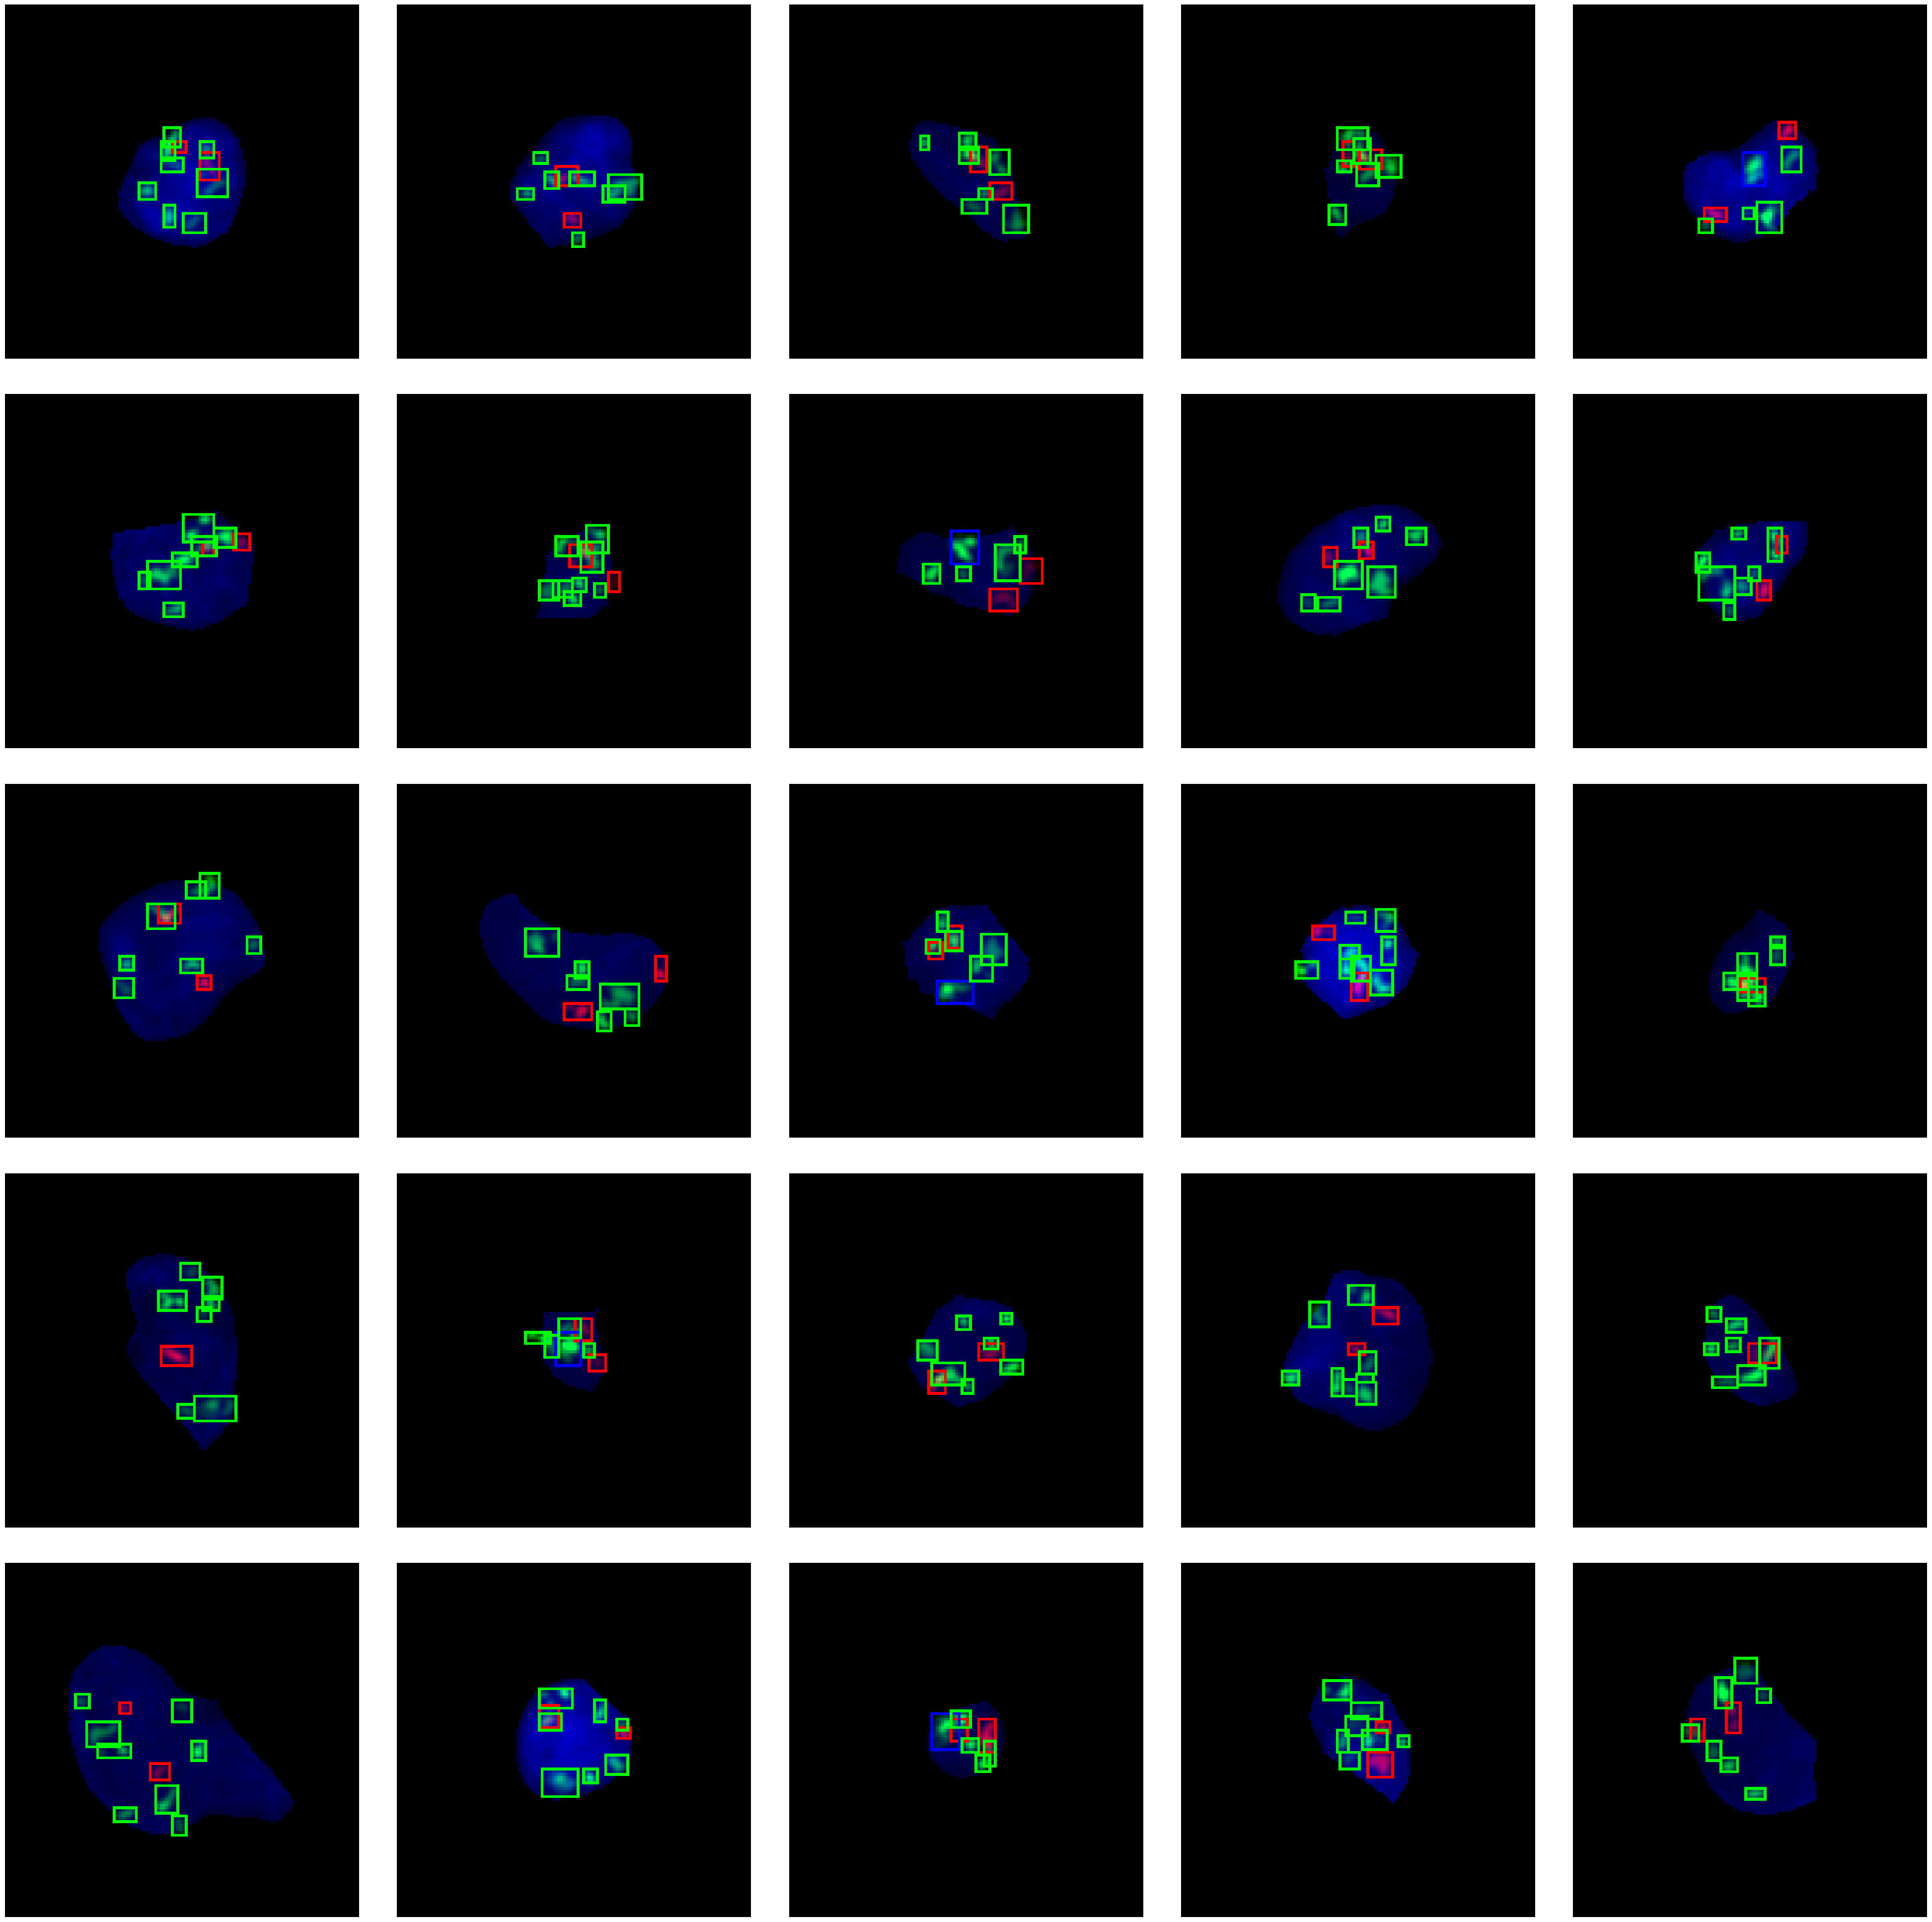

In [5]:
ps = []
for patch, mask in zip(patches, masks):
    p, bb = create_FISH(patch.copy(), mask.copy(), num_red=2, num_green=8)
    bb = merge_boxes_by_color(bb)
    new_img = draw_boxes_on_patch(p, bb)
    ps.append(new_img)
    if len(ps) >= 25:
        break
    
gridPlot(ps, plot_size=(50,50))